In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/minwage.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
        
act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.743439,0.754516,-0.422878,0.771947,0.081403,0.082651,0.765414,0.920181,0.865936,...,0.777697,-0.222159,0.610635,-0.830349,-0.490307,0.709562,0.232930,-0.467612,0.846757,0.866695
Arkansas,-0.743439,1.000000,-0.653002,0.191388,-0.520821,-0.186586,-0.027866,-0.313572,-0.501169,-0.438548,...,-0.313795,0.169855,-0.482036,0.856790,0.318335,-0.440933,-0.310576,0.561865,-0.433212,-0.688492
California,0.754516,-0.653002,1.000000,0.257105,0.958345,0.574726,0.611722,0.314444,0.546357,0.725835,...,0.369819,0.438446,0.907433,-0.474055,0.062575,0.952727,0.764781,0.016908,0.527028,0.923244
Colorado,-0.422878,0.191388,0.257105,1.000000,0.177823,0.761905,0.796957,-0.709397,-0.592026,-0.217265,...,-0.654783,0.893099,0.403906,0.588172,0.831704,0.259820,0.747984,0.727456,-0.540613,0.004714
Connecticut,0.771947,-0.520821,0.958345,0.177823,1.000000,0.548849,0.604935,0.401899,0.637223,0.795181,...,0.454935,0.432379,0.896202,-0.446754,-0.028406,0.959164,0.705501,0.003312,0.567502,0.953085


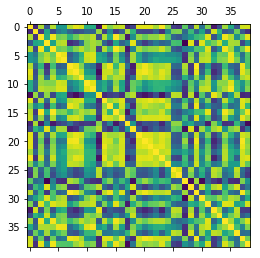

In [60]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

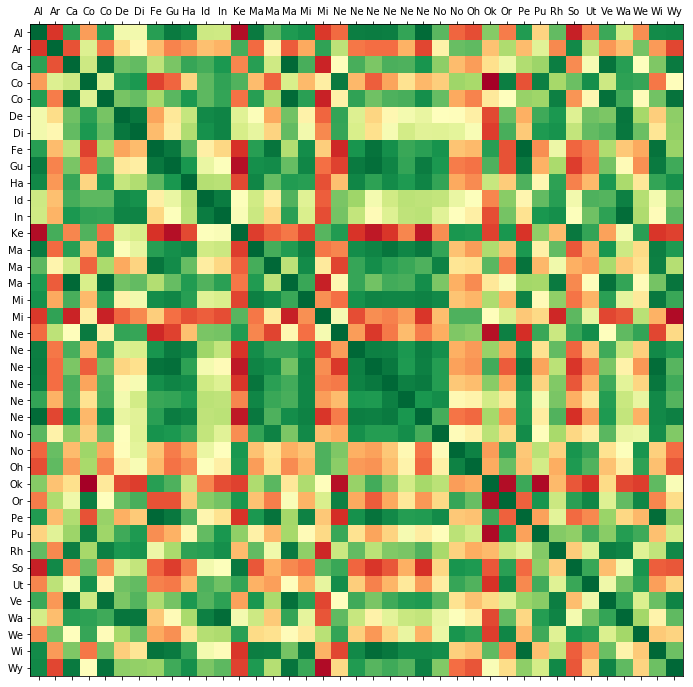

In [61]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [62]:
import pandas as pd
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

dfs = pd.read_html(web.text)

In [63]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [64]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [65]:
state_abbv.to_csv("datasets/state_abbv.csv", index = False)

In [66]:
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col = 0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [67]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()

abbv_dict = abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [68]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Federal (FLSA)'

In [71]:
abbv_dict['Federal (FLSA)'] = "FLSA"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

In [72]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

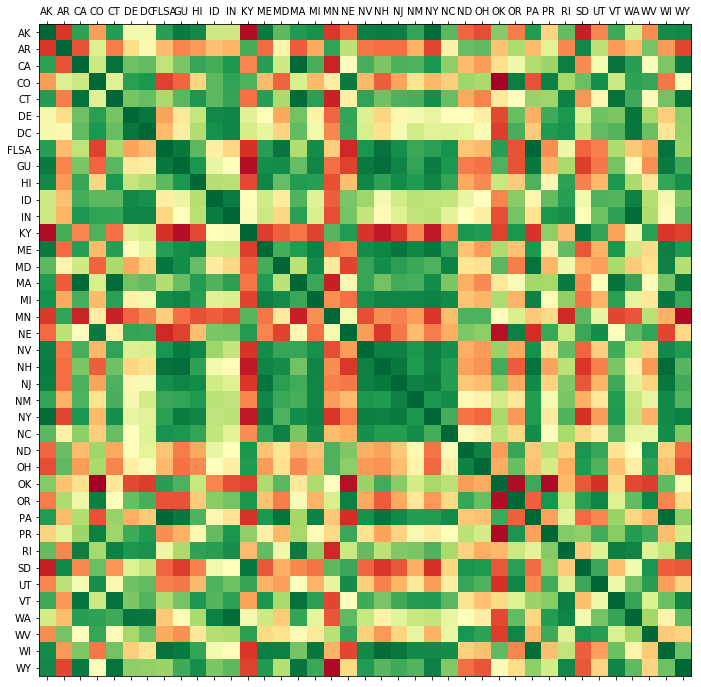

In [73]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()